## 0.3 Making dataset

In [1]:
cd ../

/Users/anacriel/plant_seed_classification


In [2]:
import src.visualization.visualize as vs
import src.features.build_features as bf
import os
import cv2
import pandas as pd
import numpy as np
from src.data.make_dataset import get_images
from src.data.make_dataset import create_dataset
from matplotlib import pyplot as plt

In [3]:
cd src/

/Users/anacriel/plant_seed_classification/src


In [4]:
proc_data_dir = '../data/raw/'
train_image_dir = os.path.join(proc_data_dir, 'train')

In [5]:
images, labels_str = get_images(train_image_dir)

In [6]:
labels_int = []
mapping = { 'Sugar beet': 0, 'Fat Hen': 1, 'Scentless Mayweed' : 2, 'Charlock' : 3,
           'Small-flowered Cranesbill': 4, 'Maize': 5, 'Shepherds Purse' :6, 'Common wheat': 7,
           'Common Chickweed': 8, 'Cleavers': 9, 'Loose Silky-bent' : 10, 'Black-grass': 11 }
for label in labels_str:
    labels_int.append(mapping[label])

In [7]:
images = np.reshape(images, (-1, 200, 200, 3))
labels = np.array(labels_int)

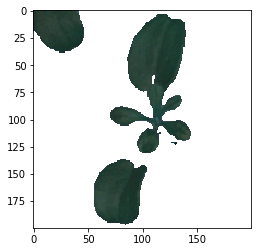

In [8]:
plt.imshow(images[0]) ##!!!!! damn 754
blur = cv2.GaussianBlur(images[0], (3, 3), 2)
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)
lower_green = np.array([22, 60, 0]) #second 75
upper_green = np.array([150, 255, 255])
mask = cv2.inRange(hsv, lower_green, upper_green)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
opened_mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
masked_img = cv2.bitwise_and(images[0], images[0], mask=opened_mask)

#masked_img = sharpen_image(masked_img)

masked_img[mask == 0] = 255

kernel = np.ones((2,2),np.uint8)
dilation = cv2.dilate(masked_img,kernel,iterations = 1)

#den_image = cv2.fastNlMeansDenoisingColored(masked_img, None, 5, 5, 5, 5)
plt.imshow(dilation)

In [9]:
#dataset = create_dataset(images, labels)
dataset = create_dataset(images, labels, kind='label')

/Users/anacriel/miniconda3/lib/python3.6/site-packages/skimage/morphology/misc.py:132: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  warn("Only one label was provided to `remove_small_objects`. "


In [10]:
dataset.head(10)

,label,area,largest_area,number_of_elems,perimeter,aspect_ratio,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,skew_r,skew_g,skew_b
0,9,8081.0,4496.5,3,559.286358,0.585938,38.708233,50.984027,60.557028,32.992428,7.096129,7.143031,7.855711,0.674907,0.227231,0.414289
0,9,9554.5,5435.0,2,548.499561,0.991071,31.487966,57.672424,67.709697,33.943030,6.194284,7.455211,7.037360,1.012593,-0.286254,0.494366
0,9,7064.0,3129.5,3,222.409161,0.969231,7.002525,57.910567,67.711947,36.566906,7.441213,7.059173,6.929987,1.284243,-0.022208,0.696010
0,9,8902.0,4440.0,3,273.279218,0.731183,8.389298,57.762575,67.379269,33.364757,6.449835,5.684232,6.536645,1.327260,0.475411,0.947661
0,9,11930.0,7304.5,2,348.575682,0.990385,10.184829,54.310651,63.228059,34.808469,7.687266,7.795908,8.403379,0.526196,0.046387,0.041887
0,9,9681.5,5164.0,2,281.279218,0.873563,8.172081,59.777061,71.016126,35.368575,6.003584,4.817318,6.615884,1.371601,-0.006474,0.738780
0,9,12837.5,12837.5,1,608.884337,1.109677,28.879465,57.665191,67.359472,25.430938,11.671010,10.784419,11.732029,0.939610,0.036892,0.271551
0,9,9508.0,6434.5,2,678.482316,0.708609,48.415887,48.724176,57.647910,31.599377,6.613299,6.766699,7.926408,1.111177,0.489484,0.640873
0,9,11368.0,5452.5,3,323.462983,1.022989,9.203756,57.106483,68.782757,33.273435,5.543166,6.899455,7.116239,-0.109973,-0.817519,-0.338298
0,9,6473.0,6473.0,1,604.641696,0.591160,56.479466,54.806447,61.800208,25.169638,10.382987,8.169043,8.472354,1.005697,0.716654,1.090426


In [11]:
dataset.to_csv("data/features_3_10_19.csv")